In [ ]:
# notes:
# conda stopped automatically setting environments up as jupyter kernels. You need to manually add kernels for each environment
# ------------------ code in terminal --------------------:
#source activate myenv
#python -m ipykernel install --user --name myenv --display-name "Python (myenv)"

In [ ]:
#conda install -c conda-forge cartopy

In [ ]:
#conda install geopandas

In [ ]:
#conda install pyproj

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas
import csv
import os
import pandas as pd
import json
import numpy as np
import pandas as pd
import re
import warnings
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from pyproj import CRS

In [ ]:
#fig = plt.figure()
#ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
# 调用ax的方法画海岸线
#ax.coastlines()
#plt.show()

In [2]:
mydata = pd.read_csv('mydata.csv',dtype="a", encoding='utf-8')

In [3]:
index =mydata.index
number_of_rows = len(index)
#find length of index
print(number_of_rows)

169318


In [6]:
# remove geo NAN cells
nan_value = float("NaN")
mydata.replace("", nan_value, inplace=True)
mydata.dropna(subset = ["geo.geo.bbox"], inplace=True)

In [7]:
index =mydata.index
number_of_rows = len(index)
#find length of index
print(number_of_rows)

169222


In [8]:
mydata['geo.geo.bbox'] = mydata['geo.geo.bbox'].astype(str)
mydata['geo.geo.bbox'] =  mydata['geo.geo.bbox'].apply(lambda x: x.replace('[','').replace(']','')) 

In [9]:
# split 'geo.geo.bbox' , keep only one pair of lon & lat
mydata[['lon','lat','lon1','lat2']] = mydata['geo.geo.bbox'].str.split(',',expand=True)

In [10]:
mydata.lat.dtype

dtype('O')

In [ ]:
# errors occur : this raw dataset has one line lack of "created info", 
# causing data Indent Forward, lon&lat contents wrong
# check position of a given cell value, find error in lat:"' CA'" - row 103355 - delete

In [11]:
def getIndexes(dfObj, value):
      
    # Empty list
    listOfPos = []
      
    # isin() method will return a dataframe with 
    # boolean values, True at the positions    
    # where element exists
    result = dfObj.isin([value])
      
    # any() method will return 
    # a boolean series
    seriesObj = result.any()
  
    # Get list of column names where 
    # element exists
    columnNames = list(seriesObj[seriesObj == True].index)
     
    # Iterate over the list of columns and
    # extract the row index where element exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
  
        for row in rows:
            listOfPos.append((row, col))
              
    # This list contains a list tuples with 
    # the index of element in the dataframe
    return listOfPos
  
# Calling getIndexes() function to get 
# the index positions of all occurrences
# of 22 in the dataframe
listOfPositions = getIndexes(mydata, ' CA')
print('Index positions of " CA" in Dataframe : ')
  
# Printing the position
for i in range(len(listOfPositions)):
    print( listOfPositions[i])

Index positions of " CA" in Dataframe : 
(103355, 'lat')


In [12]:
# check dataset
mydata.loc[[103355]]

,created_at,text,id,author_id,geo.name,geo.country_code,geo.country,geo.place_type,geo.geo.bbox,geo.full_name,...,author.created_at,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.tweet_count,author.public_metrics.listed_count,author.location,lon,lat,lon1,lat2
103355,#Cat #Chita #AnimalPrint #Purr #Scratch https:...,1383070953425494022,1273292849350619136,San Francisco,US,Etats-Unis,city,"[-122.514926, 37.708075, -122.357031, 37.833238]","San Francisco, CA",0,...,149,188,379,4,"Miami, FL",NaN,San Francisco,CA,None,None


In [13]:
i = mydata[((mydata.lat == ' CA') &( mydata.lon == 'San Francisco'))].index 

In [14]:
mydata=mydata.drop(i)

In [15]:
index =mydata.index
number_of_rows = len(index)
#find length of index
print(number_of_rows)

169221


In [16]:
mydata[['geo.full_name']].head(10)

,geo.full_name
0,T-Mobile
1,"Los Angeles, CA"
2,"Lansing, MI"
3,"Christchurch City, New Zealand"
4,"University, FL"
5,"Waynesboro, VA"
6,"Surrey, British Columbia"
7,"Portsmouth, England"
8,"Weymouth, MA"
9,"Dubaï, Emirats Arabes Unis"


In [18]:
mydata['lon'] = mydata['lon'].astype(float)

In [19]:
mydata['lat'] = mydata['lat'].astype(float, errors = 'raise')

In [20]:
geometry = [Point(xy) for xy in zip(mydata['lon'], mydata['lat'])]

In [21]:
df1 = mydata.iloc[:7269,:]
df2 = mydata.iloc[7270:19119,:]
df3 = mydata.iloc[19120:33306,:]
df4 = mydata.iloc[33307:44058,:]
df5 = mydata.iloc[44059:70895,:]
df6 = mydata.iloc[70896:86167,:]
df7 = mydata.iloc[86168:93539,:]
df8 = mydata.iloc[93540:143003,:]
df9 = mydata.iloc[143004:160854,:]
df10 = mydata.iloc[160855:,:]

In [22]:
df1.head(3)

,created_at,text,id,author_id,geo.name,geo.country_code,geo.country,geo.place_type,geo.geo.bbox,geo.full_name,...,author.created_at,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.tweet_count,author.public_metrics.listed_count,author.location,lon,lat,lon1,lat2
0,2021-04-29T23:39:55.000Z,Customers are loving this 5G for All Trade in ...,1387914576784592896,992609029326176257,T-Mobile,US,Etats-Unis,poi,"-117.98766875335787, 33.70094049431383, -117.9...",T-Mobile,...,2018-05-05T03:36:49.000Z,360,477,621,0,NaN,-117.987669,33.700940,-117.98766875335787,33.70094049431383
1,2021-04-29T23:33:03.000Z,These 5G speeds are crazy! @TMobile #WeWontSto...,1387912847909220352,66944716,Los Angeles,US,Etats-Unis,city,"-118.668404, 33.704538, -118.155409, 34.337041","Los Angeles, CA",...,2009-08-19T08:04:12.000Z,137,959,125,2,"Los Angeles, CA",-118.668404,33.704538,-118.155409,34.337041
2,2021-04-29T23:02:52.000Z,This reads very strangely because it’s an inco...,1387905252066832384,18609072,Lansing,US,Etats-Unis,city,"-84.63184, 42.6185662, -84.483958, 42.805532","Lansing, MI",...,2009-01-04T19:25:54.000Z,5377,2684,15426,143,No more than 6 miles from a body of water,-84.631840,42.618566,-84.483958,42.805532


In [23]:
df1['lat'].dtypes

dtype('float64')

<Figure size 8640x7200 with 0 Axes>

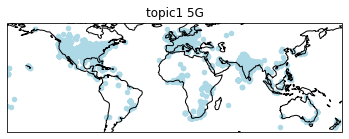

In [24]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
# 调用ax的方法画海岸线
ax.coastlines()

df1.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="YlOrRd", 
        title=f"topic1 5G", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

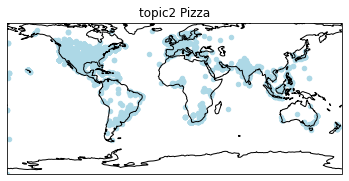

In [25]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
# 调用ax的方法画海岸线
ax.coastlines()

df2.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="YlOrRd", 
        title=f"topic2 Pizza", 
        ax=ax)
# add grid
ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

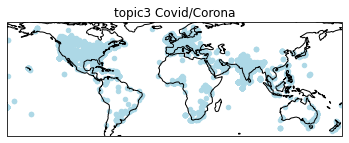

In [26]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
# 调用ax的方法画海岸线
ax.coastlines()

df3.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="YlOrRd", 
        title=f"topic3 Covid/Corona", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

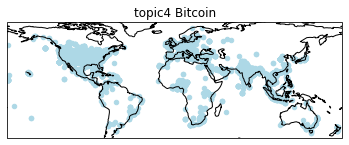

In [27]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
# 调用ax的方法画海岸线
ax.coastlines()

df4.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="YlOrRd", 
        title=f"topic4 Bitcoin", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

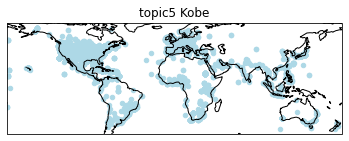

In [28]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
# 调用ax的方法画海岸线
ax.coastlines()

df5.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="YlOrRd", 
        title=f"topic5 Kobe", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

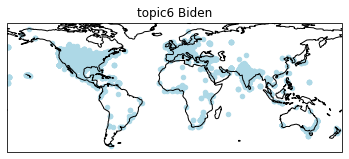

In [29]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
# 调用ax的方法画海岸线
ax.coastlines()

df6.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="Blues", 
        title=f"topic6 Biden", 
        ax=ax)
# add grid
ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

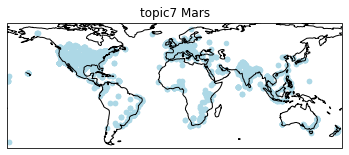

In [30]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
# 调用ax的方法画海岸线
ax.coastlines()

df7.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="Blues", 
        title=f"topic7 Mars", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

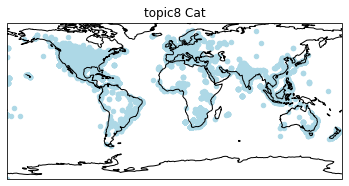

In [31]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
# 调用ax的方法画海岸线
ax.coastlines()

df8.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="Blues", 
        title=f"topic8 Cat", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

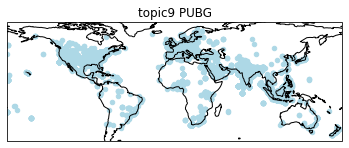

In [32]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
# 调用ax的方法画海岸线
ax.coastlines()

df9.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="Blues", 
        title=f"topic9 PUBG", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

<Figure size 8640x7200 with 0 Axes>

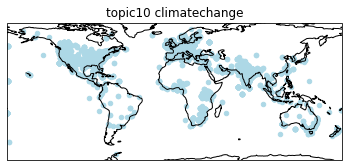

In [33]:
plt.figure(figsize=(120,100))
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# 调用ax的方法画海岸线
ax.coastlines()
#ax.stock_img()
#ax.gridlines()

df10.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", #colormap="Blues", 
        title=f"topic10 climatechange", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

In [34]:
# --------------------------     USA plot     -----------------------  #

In [36]:
#df1[['geo.full_name']].head(10)
df1.head(2)

,created_at,text,id,author_id,geo.name,geo.country_code,geo.country,geo.place_type,geo.geo.bbox,geo.full_name,...,author.created_at,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.tweet_count,author.public_metrics.listed_count,author.location,lon,lat,lon1,lat2
0,2021-04-29T23:39:55.000Z,Customers are loving this 5G for All Trade in ...,1387914576784592896,992609029326176257,T-Mobile,US,Etats-Unis,poi,"-117.98766875335787, 33.70094049431383, -117.9...",T-Mobile,...,2018-05-05T03:36:49.000Z,360,477,621,0,NaN,-117.987669,33.700940,-117.98766875335787,33.70094049431383
1,2021-04-29T23:33:03.000Z,These 5G speeds are crazy! @TMobile #WeWontSto...,1387912847909220352,66944716,Los Angeles,US,Etats-Unis,city,"-118.668404, 33.704538, -118.155409, 34.337041","Los Angeles, CA",...,2009-08-19T08:04:12.000Z,137,959,125,2,"Los Angeles, CA",-118.668404,33.704538,-118.155409,34.337041


In [37]:
USdata1 = df1.loc[df1['geo.country_code'] == 'US']
index =USdata1.index
number_of_rows = len(index)
#find length of index
print(number_of_rows)

4087


In [38]:
USdata2 = df2.loc[df2['geo.country_code'] == 'US']
USdata3 = df3.loc[df3['geo.country_code'] == 'US']
USdata4 = df4.loc[df4['geo.country_code'] == 'US']
USdata5 = df5.loc[df5['geo.country_code'] == 'US']
USdata6 = df6.loc[df6['geo.country_code'] == 'US']
USdata7 = df7.loc[df7['geo.country_code'] == 'US']
USdata8 = df8.loc[df8['geo.country_code'] == 'US']
USdata9 = df9.loc[df9['geo.country_code'] == 'US']
USdata10 = df10.loc[df10['geo.country_code'] == 'US']

In [39]:
USdata1.head(3)

,created_at,text,id,author_id,geo.name,geo.country_code,geo.country,geo.place_type,geo.geo.bbox,geo.full_name,...,author.created_at,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.tweet_count,author.public_metrics.listed_count,author.location,lon,lat,lon1,lat2
0,2021-04-29T23:39:55.000Z,Customers are loving this 5G for All Trade in ...,1387914576784592896,992609029326176257,T-Mobile,US,Etats-Unis,poi,"-117.98766875335787, 33.70094049431383, -117.9...",T-Mobile,...,2018-05-05T03:36:49.000Z,360,477,621,0,NaN,-117.987669,33.700940,-117.98766875335787,33.70094049431383
1,2021-04-29T23:33:03.000Z,These 5G speeds are crazy! @TMobile #WeWontSto...,1387912847909220352,66944716,Los Angeles,US,Etats-Unis,city,"-118.668404, 33.704538, -118.155409, 34.337041","Los Angeles, CA",...,2009-08-19T08:04:12.000Z,137,959,125,2,"Los Angeles, CA",-118.668404,33.704538,-118.155409,34.337041
2,2021-04-29T23:02:52.000Z,This reads very strangely because it’s an inco...,1387905252066832384,18609072,Lansing,US,Etats-Unis,city,"-84.63184, 42.6185662, -84.483958, 42.805532","Lansing, MI",...,2009-01-04T19:25:54.000Z,5377,2684,15426,143,No more than 6 miles from a body of water,-84.631840,42.618566,-84.483958,42.805532


<Figure size 864x720 with 0 Axes>

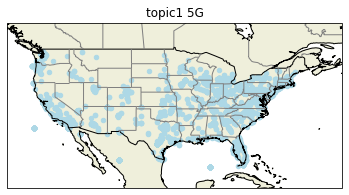

In [40]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()

import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
#ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
USdata1.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", colormap="Blues", 
        title=f"topic1 5G", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

In [68]:
# USdata1['geo.full_name'].unique()

In [69]:
#test2=USdata1.loc[USdata1['geo.full_name'] != 'T-Mobile']

In [70]:
#test2.head(3)

In [71]:
## error: split 'geo.full_name' 
# test2[['geocity','geostate']] = test2['geo.full_name'].str.split(',',expand=True)

In [72]:
USdata1['count'] = 1
dataByNeighbourhood = USdata1.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<ipython-input-72-bec9ec357018>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata1['count'] = 1


,geo.full_name,count
63,"austin, tx",95
748,"los angeles, ca",88
214,"chicago, il",73
775,"manhattan, ny",71
910,"nashua, nh",68
147,"brooklyn, ny",67
565,"houston, tx",66
1078,"phoenix, az",62
424,"florida, usa",59
475,"georgia, usa",51


In [ ]:
#conda install -c conda-forge geoplot

<Figure size 864x720 with 0 Axes>

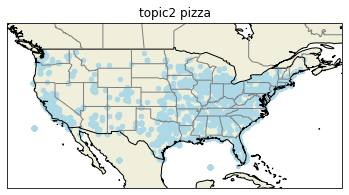

In [75]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()

import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
#ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
USdata2.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", colormap="Blues", 
        title=f"topic2 pizza", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

In [74]:
USdata2['count'] = 1
dataByNeighbourhood = USdata2.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<ipython-input-74-d9a4c651133f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata2['count'] = 1


,geo.full_name,count
1201,"los angeles, ca",241
365,"chicago, il",211
961,"houston, tx",177
1256,"manhattan, ny",176
619,"elizabeth, nj",114
1899,"san francisco, ca",111
705,"florida, usa",103
256,"brooklyn, ny",98
1674,"philadelphia, pa",97
1894,"san antonio, tx",83


<Figure size 864x720 with 0 Axes>

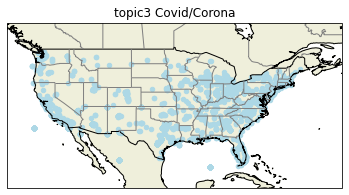

In [76]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()

import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
#ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
USdata3.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", colormap="Blues", 
        title=f"topic3 Covid/Corona", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

In [78]:
USdata3['count'] = 1
dataByNeighbourhood = USdata3.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<ipython-input-78-4d2ffacb9bc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata3['count'] = 1


,geo.full_name,count
693,"los angeles, ca",87
1282,"washington, dc",76
725,"manhattan, ny",71
210,"chicago, il",63
146,"brooklyn, ny",61
544,"houston, tx",55
402,"florida, usa",51
995,"queens, ny",48
962,"philadelphia, pa",46
980,"portland, or",38


<Figure size 864x720 with 0 Axes>

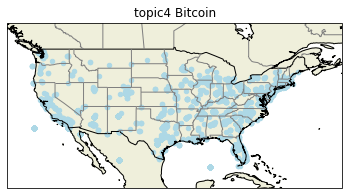

In [79]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()

import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
#ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
USdata4.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", colormap="Blues", 
        title=f"topic4 Bitcoin", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()

In [80]:
USdata4['count'] = 1
dataByNeighbourhood = USdata4.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<ipython-input-80-39caf2cd64f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata4['count'] = 1


,geo.full_name,count
556,"los angeles, ca",265
956,"staten island, ny",239
572,"manhattan, ny",140
163,"chicago, il",133
45,"austin, tx",112
431,"houston, tx",103
860,"san diego, ca",100
317,"florida, usa",89
113,"brooklyn, ny",72
355,"georgia, usa",63


<Figure size 864x720 with 0 Axes>

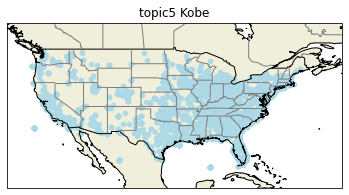

<ipython-input-81-fcc47838bae8>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata5['count'] = 1


,geo.full_name,count
1720,"los angeles, ca",1698
1360,"houston, tx",629
1108,"georgia, usa",469
514,"chicago, il",363
2417,"philadelphia, pa",324
2473,"pomona, ca",318
997,"florida, usa",309
347,"brooklyn, ny",280
3072,"texas, usa",241
110,"atlanta, ga",236


In [81]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()

import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
#ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
USdata5.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", colormap="Blues", 
        title=f"topic5 Kobe", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()
USdata5['count'] = 1
dataByNeighbourhood = USdata5.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<Figure size 864x720 with 0 Axes>

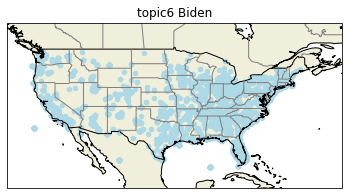

<ipython-input-82-76678835e8f7>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata6['count'] = 1


,geo.full_name,count
2195,"washington, dc",485
1162,"los angeles, ca",272
669,"florida, usa",249
1214,"manhattan, ny",235
761,"georgia, usa",208
475,"dallas, tx",194
714,"franklin park, nj",166
245,"brooklyn, ny",160
1623,"pennsylvania, usa",150
353,"chicago, il",134


In [82]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()

import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
#ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
USdata6.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", colormap="Blues", 
        title=f"topic6 Biden", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()
USdata6['count'] = 1
dataByNeighbourhood = USdata6.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<Figure size 864x720 with 0 Axes>

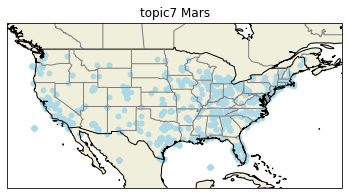

<ipython-input-83-a5f986a469d6>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata7['count'] = 1


,geo.full_name,count
99,"california, usa",253
766,"waimalu, hi",133
403,"los angeles, ca",131
343,"kentucky, usa",111
415,"manhattan, ny",73
86,"brooklyn, ny",68
237,"florida, usa",50
126,"chicago, il",50
35,"austin, tx",48
734,"texas, usa",46


In [83]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()

import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
#ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
USdata7.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", colormap="Blues", 
        title=f"topic7 Mars", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()
USdata7['count'] = 1
dataByNeighbourhood = USdata7.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<Figure size 864x720 with 0 Axes>

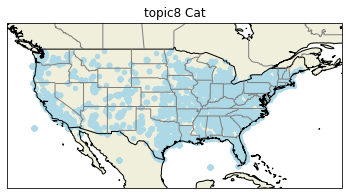

<ipython-input-85-b11ae3cc8090>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata8['count'] = 1


,geo.full_name,count
2255,"los angeles, ca",982
474,"brooklyn, ny",576
684,"chicago, il",562
1805,"houston, tx",512
2339,"manhattan, ny",499
3106,"philadelphia, pa",376
1293,"florida, usa",373
3472,"san diego, ca",349
1464,"georgia, usa",342
188,"austin, tx",304


In [85]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()

import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
#ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
USdata8.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", colormap="Blues", 
        title=f"topic8 Cat", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()
USdata8['count'] = 1
dataByNeighbourhood = USdata8.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<Figure size 864x720 with 0 Axes>

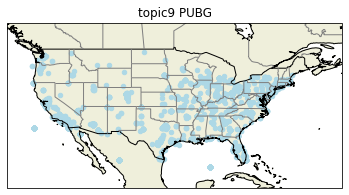

<ipython-input-86-8b69426f68fa>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata9['count'] = 1


,geo.full_name,count
110,"charlotte, nc",174
303,"huntington beach, ca",160
390,"los angeles, ca",86
259,"grandview, mo",66
36,"austin, tx",64
114,"chicago, il",62
560,"pleasant hill, mo",61
28,"arizona, usa",49
401,"malden, ma",45
705,"texas, usa",44


In [86]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()

import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
#ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
USdata9.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", colormap="Blues", 
        title=f"topic9 PUBG", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()
USdata9['count'] = 1
dataByNeighbourhood = USdata9.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

<Figure size 864x720 with 0 Axes>

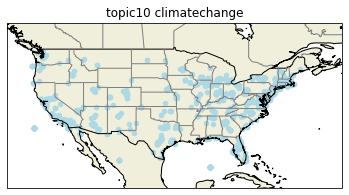

<ipython-input-87-00c653d62ca3>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USdata10['count'] = 1


,geo.full_name,count
680,"washington, dc",114
353,"manhattan, ny",78
341,"los angeles, ca",75
429,"new york, usa",48
11,"alexandria, va",43
552,"san francisco, ca",40
117,"chicago, il",39
274,"houston, tx",35
577,"seattle, wa",26
508,"portland, or",25


In [87]:
fig = plt.figure(figsize=(12,10))
fig = plt.figure()

import cartopy.feature as cfeature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130,-60,20,49])
ax.coastlines()
#ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
USdata10.plot(x="lon", y="lat", kind="scatter", 
        c="lightblue", colormap="Blues", 
        title=f"topic10 climatechange", 
        ax=ax)
# add grid
#ax.grid(b=True, alpha=0.5)
plt.show()
USdata10['count'] = 1
dataByNeighbourhood = USdata10.groupby('geo.full_name').count()[['count']].reset_index()
dataByNeighbourhood['geo.full_name'] = dataByNeighbourhood['geo.full_name'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)

In [90]:
# save dfs
df1.to_csv('df1.csv',index=False)
df2.to_csv('df2.csv',index=False)
df3.to_csv('df3.csv',index=False)
df4.to_csv('df4.csv',index=False)
df5.to_csv('df5.csv',index=False)
df6.to_csv('df6.csv',index=False)
df7.to_csv('df7.csv',index=False)
df8.to_csv('df8.csv',index=False)
df9.to_csv('df9.csv',index=False)
df10.to_csv('df10.csv',index=False)